# Human protein classification

In [2]:
import numpy as np 
import pandas as pd 
from pprint import pprint
from PIL import Image

import os
root_train_directory = '/kaggle/input/human-protein-atlas-image-classification/train/'
root_test_directory = '/kaggle/input/human-protein-atlas-image-classification/test/'
input_shape=(128,128,4)

name_label_dict = {
0:  'Nucleoplasm',
1:  'Nuclear membrane',
2:  'Nucleoli',   
3:  'Nucleoli fibrillar center',
4:  'Nuclear speckles',
5:  'Nuclear bodies',
6:  'Endoplasmic reticulum',   
7:  'Golgi apparatus',
8:  'Peroxisomes',
9:  'Endosomes',
10:  'Lysosomes',
11:  'Intermediate filaments',
12:  'Actin filaments',
13:  'Focal adhesion sites',   
14:  'Microtubules',
15:  'Microtubule ends',  
16:  'Cytokinetic bridge',   
17:  'Mitotic spindle',
18:  'Microtubule organizing center',  
19:  'Centrosome',
20:  'Lipid droplets',
21:  'Plasma membrane',   
22:  'Cell junctions', 
23:  'Mitochondria',
24:  'Aggresome',
25:  'Cytosol',
26:  'Cytoplasmic bodies',   
27:  'Rods & rings' }

In [3]:
train_df = pd.read_csv('/kaggle/input/human-protein-atlas-image-classification/train.csv')
train_df.set_index('Id',inplace=True)
train = train_df.to_dict()['Target']
train_img_names = list(train.keys())
#print(train_img_names)

In [4]:
SIZE = (128,128)
def get_labels(img):
    return list(map(int, train[img].split(' ')))
# We'll fusion images
def open_multilayer_image(path, test=False):
    fullpath = root_train_directory+path
    if test:
        fullpath = root_test_directory+path
    red = plt.imread(fullpath+"_red.png")
    red = cv2.resize(red, SIZE)
    green = plt.imread(fullpath+"_green.png")
    green = cv2.resize(green, SIZE)
    blue = plt.imread(fullpath+"_blue.png")
    blue = cv2.resize(blue, SIZE)
    yellow = plt.imread(fullpath+"_yellow.png")
    yellow = cv2.resize(yellow, SIZE)
    ni = np.zeros((SIZE[0],SIZE[1],4), 'uint8')
    ni[..., 0] = red*255
    ni[..., 1] = green*255
    ni[..., 2] = blue*255
    ni[..., 3] = yellow*255
    return ni

We can have an idea of what's the date look like by looking at a few samples selected randomly along with their labels.

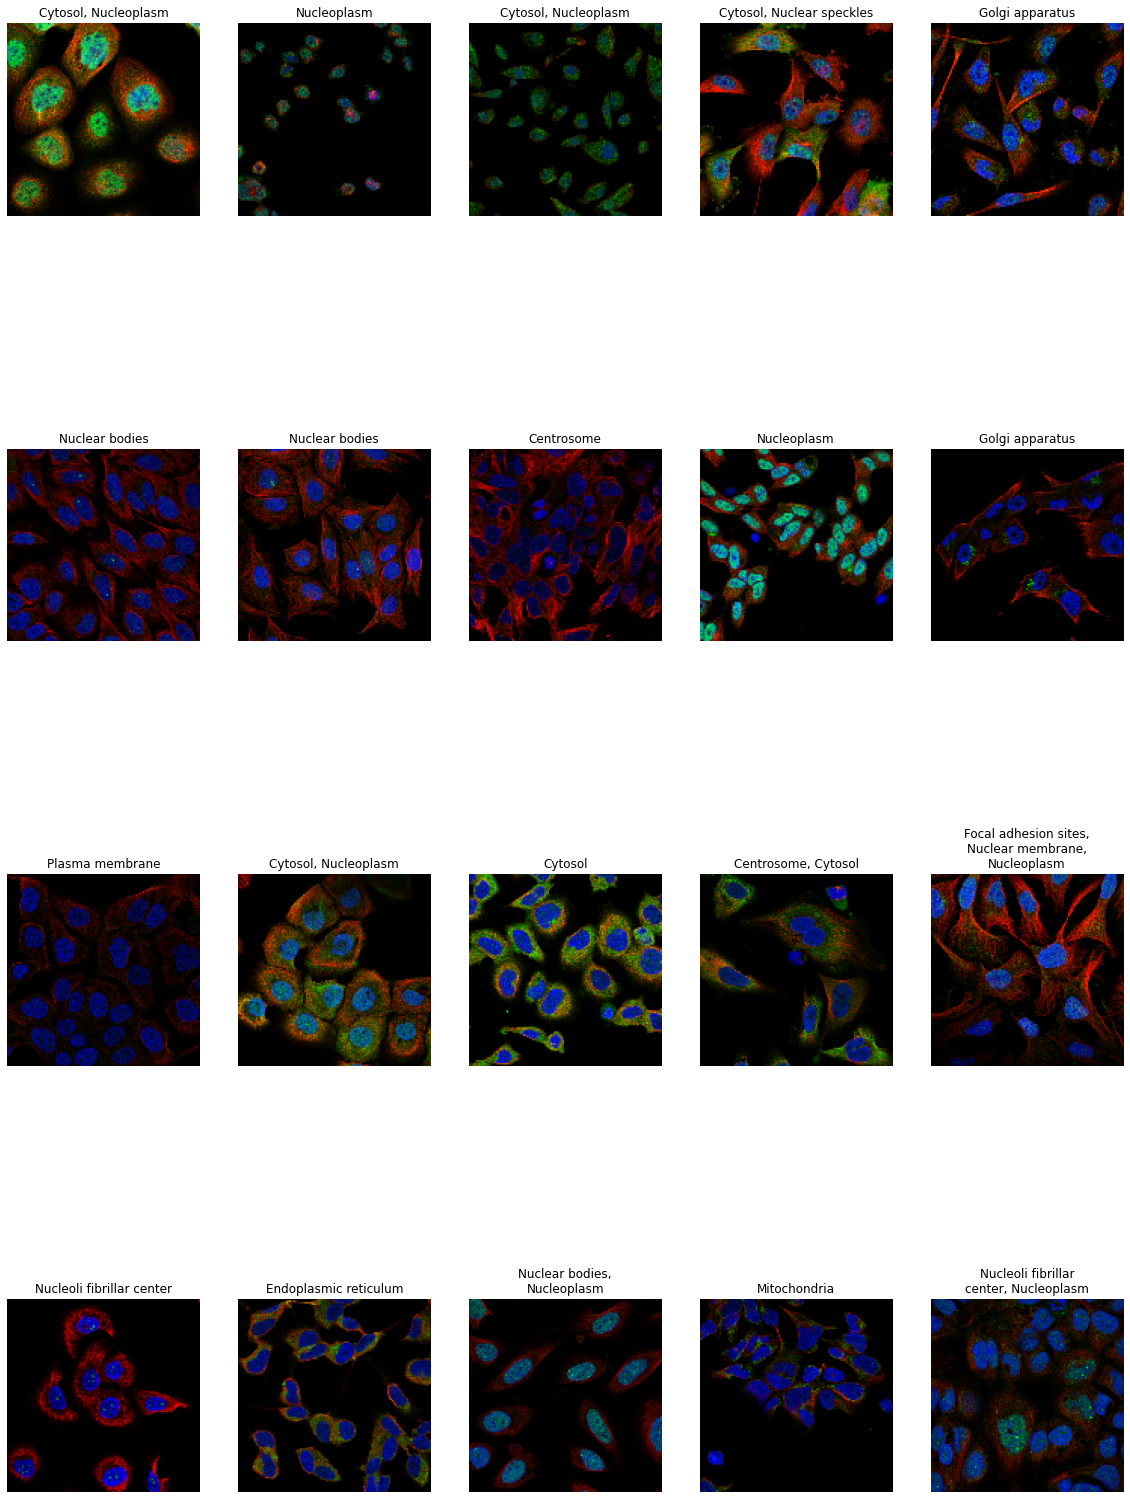

In [5]:
import cv2
import matplotlib.pyplot as plt
from random import randrange
from textwrap import wrap

#print('labels:',get_labels(img_name))

fig=plt.figure(figsize=(20, 30))

columns = 5
rows = 4
for i in range(1, columns*rows +1):
    num = randrange(len(train_img_names))
    img_name = train_img_names[num]
    img = open_multilayer_image(img_name)
    sub = fig.add_subplot(rows, columns, i)
    # make title
    title = ''
    for label in get_labels(img_name):
        title+=name_label_dict[label]+', '
    sub.set_title("\n".join(wrap(title[:-2],25)))
    plt.axis('off')
    plt.imshow(img[...,:-1])
plt.show();

# Other visualizations

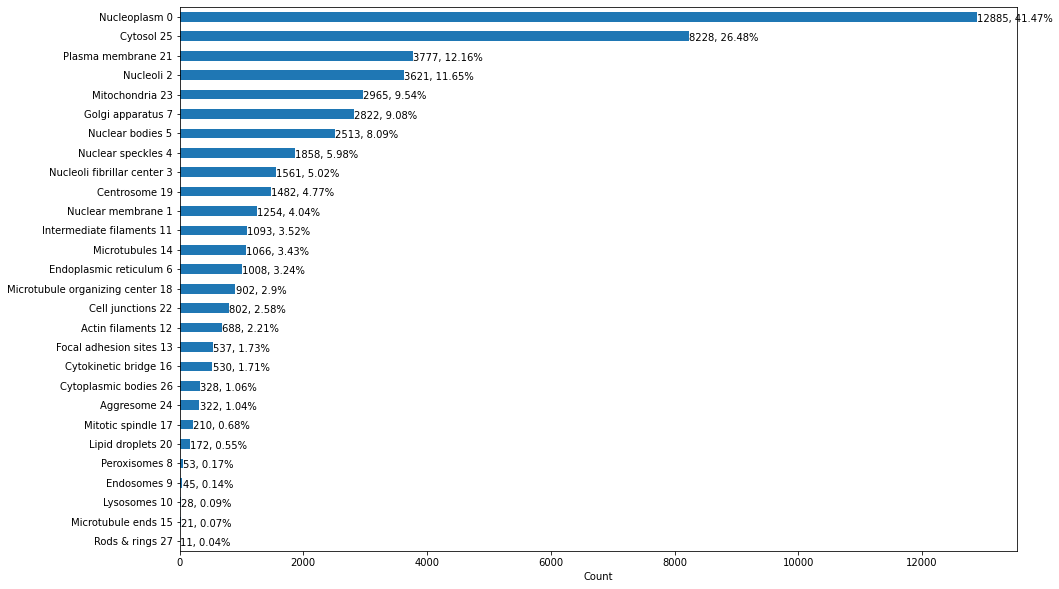

In [6]:
df = pd.read_csv("../input/human-protein-atlas-image-classification/train.csv")

for key in name_label_dict.keys():
    df[key] = df['Target'].apply(lambda x: int(str(key) in x.split()))

targets_df = df.drop(labels=['Id', 'Target'], axis=1)


target_counts = pd.DataFrame({'Localization': [v + ' ' + str(k) for k, v in name_label_dict.items()],
                              'Count': targets_df[name_label_dict.keys()].sum().values})
target_counts.sort_values('Count', inplace=True)
ax = target_counts.plot.barh(x='Localization', y='Count',figsize=(15,10), legend=False)

for i, v in enumerate(target_counts['Count']):
    ax.text(v + 3, i - 0.25, str(v) + ', ' + str(round(v / len(df) * 100, 2)) + '%')
ax.set_xlabel('Count');
ax.set_ylabel('');


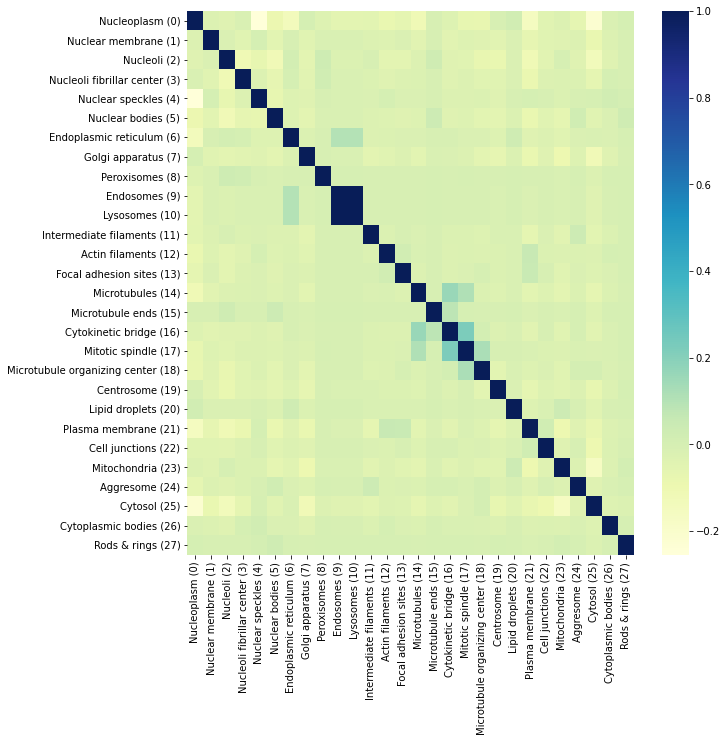

In [7]:
import seaborn as sns
targets_df['num_labels'] = targets_df.sum(axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(targets_df[targets_df['num_labels']>1].drop(['num_labels'], axis=1).rename(
    columns={k: f"{v} ({str(k)})" for k, v in name_label_dict.items()}
).corr(), cmap='YlGnBu');